# Imports

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.providers.aer import AerSimulator

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Enigme : La porte au trésor

Les deux gardiens sont liés par une règle : l'un dit toujours la vérité, l'autre ment toujours. </br>
Vous ne savez pas qui est qui.  </br>
Vous pouvez leur poser une seule question à l'un des deux gardiens. **Quelle question poser pour savoir quelle porte mène au trésor ?**

## Création du circuit de l'énigme

In [2]:
circuit = QuantumCircuit(3, 1)

## Nous placons nos deux portes Hadamard corresponsant a notre emplacement du trésor ainsi qu'au début de notre qubit du mensonge

In [3]:
circuit.h(0)  # Porte Hadamard sur le qubit 0
circuit.h(2)  # Porte Hadamard sur le qubit 2

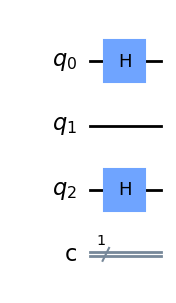

In [4]:
circuit.draw('mpl')

## On place ensuite une porte CNOT entre le premier et le deuxième qubit pour s'assurer que les gardien savent la même chose

In [5]:
circuit.cx(0, 1)  # CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible

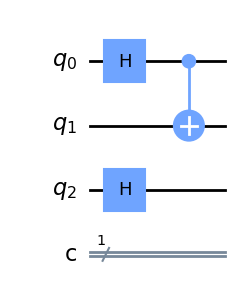

In [6]:
circuit.draw('mpl')

In [7]:
circuit.cx(2, 1)  # CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible

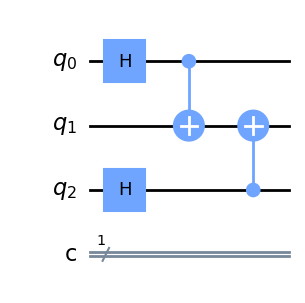

In [8]:
circuit.draw('mpl')

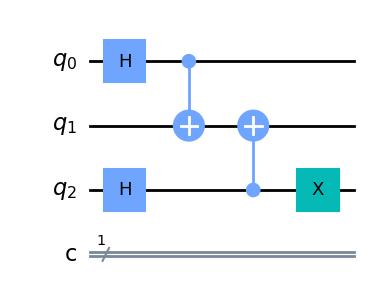

In [9]:
circuit.x(2)  # Porte X sur le qubit 0
circuit.draw('mpl')

## Si le gardien ment, nous inversons sa réponse

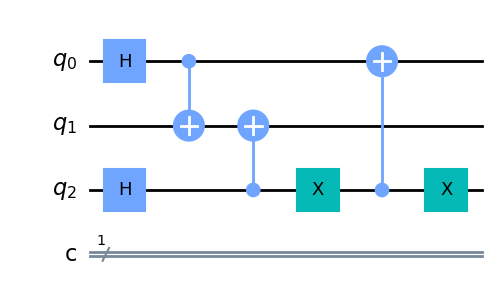

In [10]:
circuit.cx(2, 0)  # CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible
circuit.x(2)  # Porte X sur le qubit 0
circuit.draw('mpl')

## On place la porte swap entre le premier qubit et le deuxière ("Que me dirait l'autre gardien si")

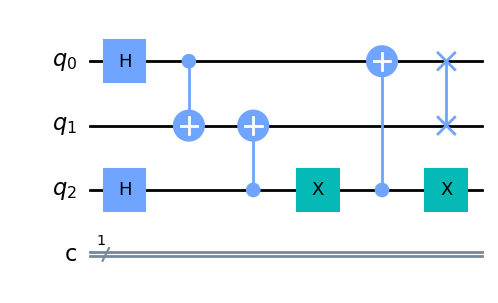

In [11]:
circuit.swap(0,1)
circuit.draw('mpl')

## Comme la question correspond à ne PAS prendre la porte, utilisons une porte not sur les deux premiers qubits

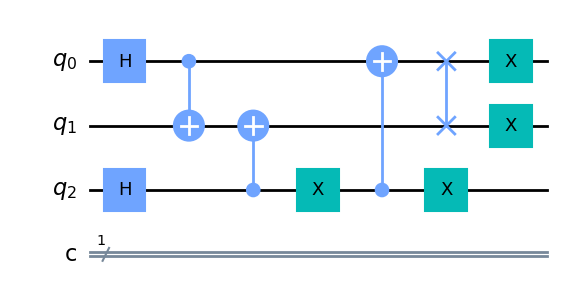

In [12]:
circuit.x(0)
circuit.x(1)
circuit.draw('mpl')

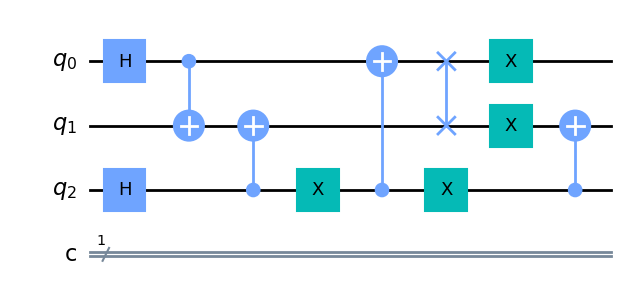

In [13]:
circuit.cx(2, 1)  # CNOT avec le qubit 0 comme contrôle et le qubit 1 comme cible
circuit.draw('mpl')

In [14]:
circuit.x(2)


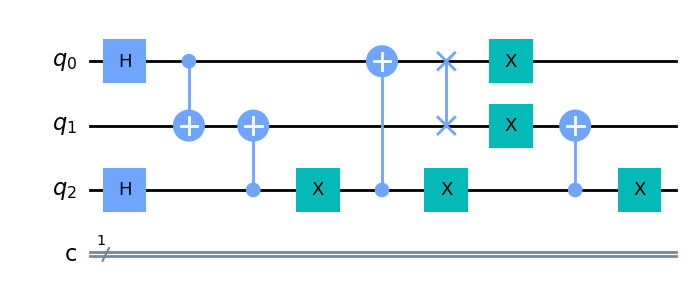

In [15]:
circuit.draw('mpl')

## On réitère le même procéssus pour le mensonge de la porte mais cette fois sur le mensonge entre les deux gardiens

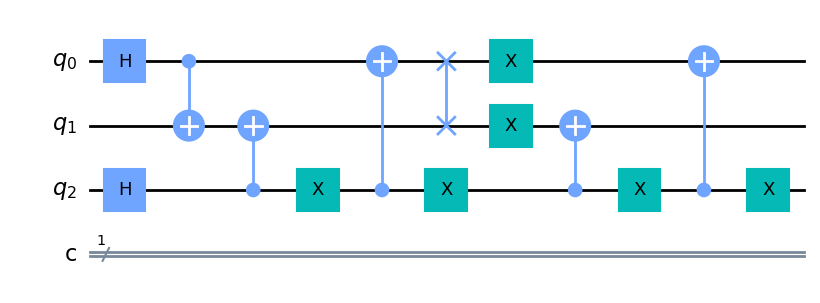

In [16]:
circuit.cx(2,0)
circuit.x(2)
circuit.draw('mpl')

## Mesure des qubits pour avoir la réponse

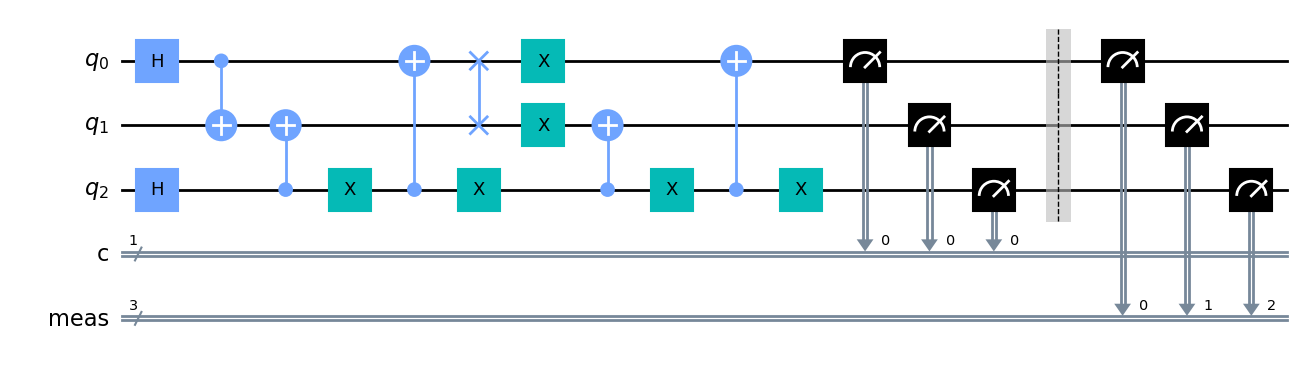

In [17]:
circuit.measure(0, 0)  # Mesure du qubit 2 et stockage dans le bit classique 0
circuit.measure(1, 0)
circuit.measure(2, 0)
circuit.measure_all() 
circuit.draw('mpl')

## Nous remarquons que chaque qubit est représenté comme étant dans l'état ∣0⟩∣0⟩, comme indiqué par le vecteur pointant vers le pôle nord de chaque sphère. Cela signifie que si vous mesurez l'état de ces qubits, vous trouverez chaque qubit dans l'état ∣0⟩∣0⟩ avec une probabilité de 100%.

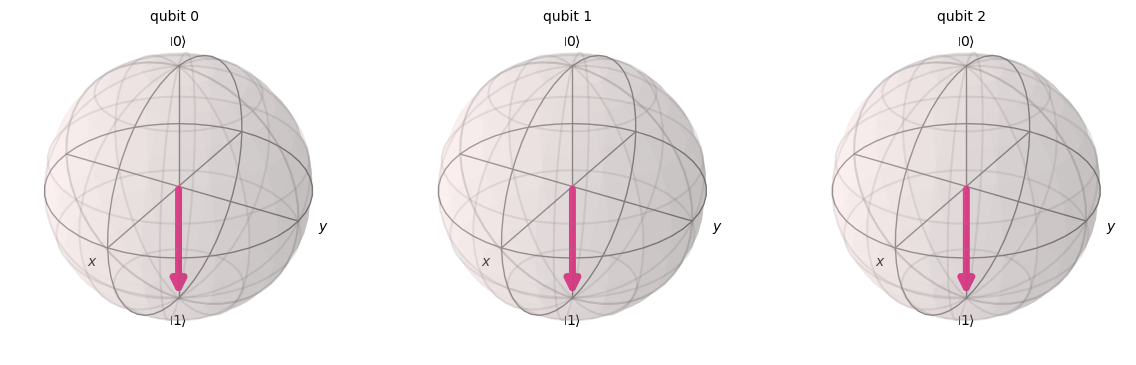

In [18]:
backend = Aer.get_backend('statevector_simulator')
result = backend.run(circuit).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

# Simulation de l'énigme avec affichage des vecteurs associés

In [21]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit, shots=100000)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


# Visualisation des Résultats :

Ici, nous pouvons comprendre que toutes les sorties convergent vers un même résultat : 011. 
Nous pouvons donc comprendre que tout les résultats présentent la même réponse et que notre code fonctionne correctement !

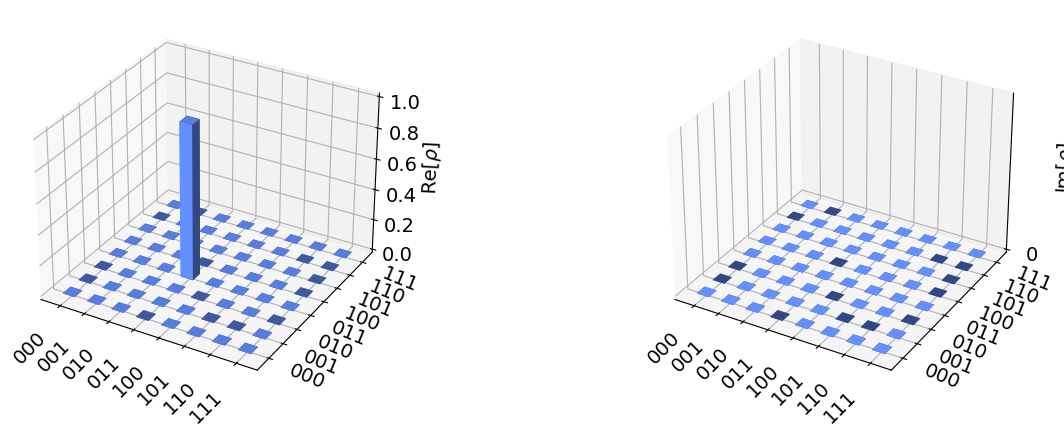

In [22]:
from qiskit.visualization import plot_state_city

plot_state_city(outputstate)

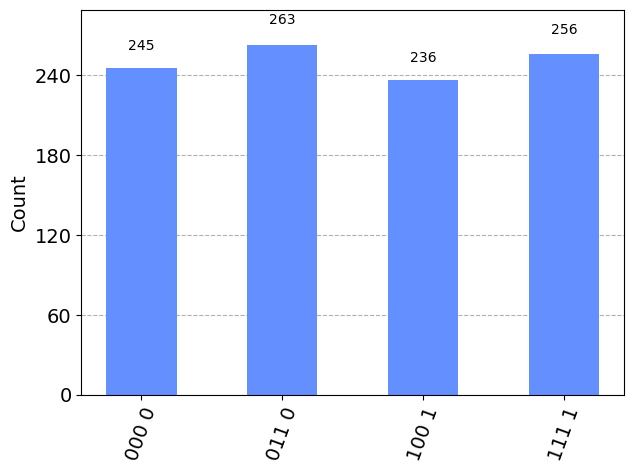

In [ ]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)